# Analysis of Foursquare Data Using Kmeans Clustering

In [215]:
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [216]:
data = gpd.read_file('NYU_March2018_subset30.geojson')

In [217]:
(list(data.columns))

['id',
 'Place Name',
 'Rating',
 'Checkins',
 'Users',
 'Visits',
 'Pricing',
 'Type',
 'Category',
 'Class',
 'geometry']

In [218]:
maps=gpd.read_file('Censustracts/total.shp')

In [219]:
maps.head()

,id,Place Name,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class,...,moe_doctor,per_col_16,pop90,per_col90,moe_hu16,hinc16,moe_hinc16,popgrowth,Type_1.19,geometry
0,3fd66200f964a5202bea1ee3,Bar Six,7.5,7129.0,4556.0,7886.0,2.0,French Restaurant,Social,Optional,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,MHI - Ongoing Exclusion,"POLYGON ((983477.0537245736 206553.0512004816,..."
1,3fd66200f964a520abe51ee3,Fiddlesticks Pub & Grill,6.1,23722.0,18806.0,28049.0,2.0,Bar,Social,Optional,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,MHI - Ongoing Exclusion,"POLYGON ((983477.0537245736 206553.0512004816,..."
2,3fd66200f964a520d0e51ee3,Spain Restaurant,7.1,2095.0,2596.0,3949.0,1.0,Tapas Restaurant,Social,Optional,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,MHI - Ongoing Exclusion,"POLYGON ((983477.0537245736 206553.0512004816,..."
3,3fd66200f964a520f2e61ee3,The Monster,7.8,10191.0,7352.0,14328.0,1.0,Gay Bar,Social,Optional,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,MHI - Ongoing Exclusion,"POLYGON ((983477.0537245736 206553.0512004816,..."
4,4388f700f964a520182b1fe3,Joe,8.8,17312.0,9611.0,23679.0,1.0,Coffee Shop,Social,Optional,...,103,0.772135,6241.0,0.594715,63,127904,11686,418.0,MHI - Ongoing Exclusion,"POLYGON ((983477.0537245736 206553.0512004816,..."


In [220]:
maps['Type_1.19'].unique()

array(['MHI - Ongoing Exclusion', 'LI - At Risk of Gentrification',
       'MHI - Advanced Gentrification',
       'MHI - Stable or Early Stage of Exclusion', 'Missing Data',
       'LI - Ongoing Gentrification', 'MHI - Advanced Exclusion',
       'VHI - Super Gentrification or Exclusion',
       'LI - Ongoing Displacement of Low-Income Households',
       'LI - Not Losing Low-Income Households'], dtype=object)

In [221]:
maps['Type_1.19'][maps['Type_1.19']==7]
#455,516

Series([], Name: Type_1.19, dtype: object)

In [222]:
maps.shape

(7431, 107)

In [223]:
print(list(maps.columns))

['id', 'Place Name', 'Rating', 'Checkins', 'Users', 'Visits', 'Pricing', 'Type', 'Category', 'Class', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'AFFGEOID', 'GEOID', 'NAME', 'LSAD', 'ALAND', 'AWATER', 'geo', 'GEOid2', 'hh16', 'moe_hh16', 'per_col00', 'per_nonwhi', 'per_rent00', 'vli2000', 'li2000', 'mi2000', 'hmi2000', 'hi2000', 'vhi2000', 'per_all_li', 'hh00', 'all_li_cou', 'per_nonw_1', 'per_rent90', 'vli1990', 'li1990', 'mi1990', 'hmi1990', 'hi1990', 'vhi1990', 'denominato', 'per_all__1', 'all_li_c_1', 'pop00', 'pop16', 'moe_pop16', 'ch_all_li_', 'ch_all_li1', 'moveinincd', 'co_med_ind', 'per_limove', 'per_limo_1', 'TOD', 'empd15', 'mrent90', 'rou90', 'mrent00', 'rou00', 'mrent16', 'moe_mrent1', 'mhval90', 'ohu90', 'mhval00', 'ohu00', 'mhval16', 'moe_mhval1', 'mhval90_00', 'mhval00_16', 'mrent90_00', 'mrent00_16', 'hu16', 'per_units_', 'ohu16', 'moe_owner1', 'rhu16', 'moe_renter', 'per_rent16', 'per_nonw_2', 'vli2016', 'li2016', 'mi2016', 'hmi2016', 'hi2016', 'vhi2016', 'per_all__2', 'all_li

In [224]:
types = maps.groupby('Type').count()[['id']].sort_values(ascending = False, by='id')

In [225]:
len(types)

142

In [226]:
category = maps.groupby('Category').count()[['id']].sort_values(ascending = False, by='id')

In [227]:
category.head()

,id
Category,
Social,4837
Nutrition,1884
Consumption,701
Leisure,9


In [228]:
plt.rcParams['figure.figsize'] = (30, 20)

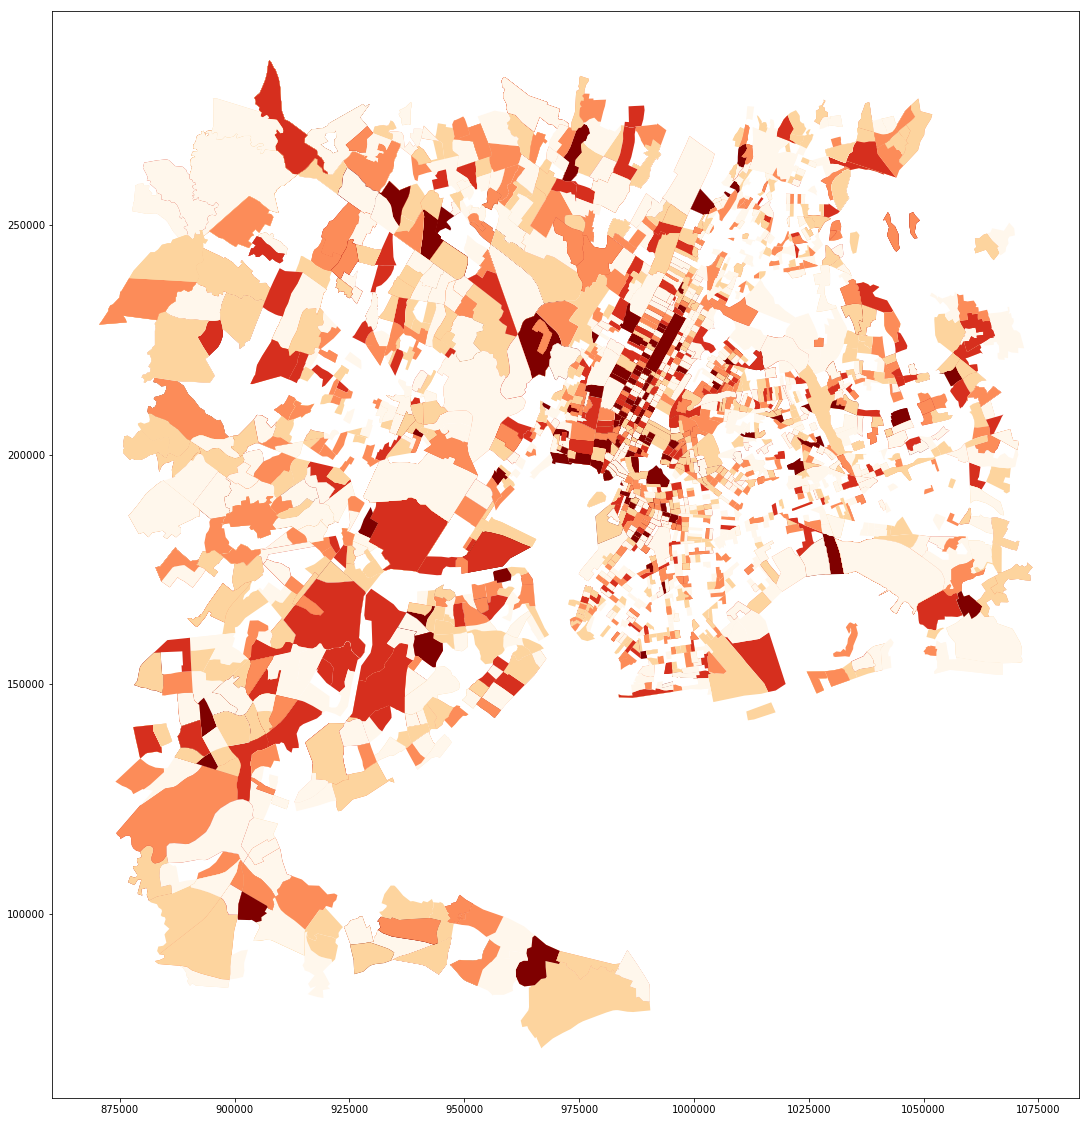

In [229]:
ax = maps.plot(column='Checkins', scheme='quantiles', cmap='OrRd')

In [230]:
print(maps.iloc[:,2:10].shape)
maps.iloc[:,2:10].dropna().shape

(7431, 8)


(7431, 8)

#  Clustering

## 1. Cluster by Foursquare attributes

In [231]:
X = maps.iloc[:,2:10]
X.iloc[:,5:8].columns

Index(['Type', 'Category', 'Class'], dtype='object')

In [232]:
for column in X.iloc[:,5:8].columns:
    print(column)
    X[column] = pd.factorize(X[column])[0]
X.head(10)

Type
Category
Class


,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class
0,7.5,7129.0,4556.0,7886.0,2.0,0,0,0
1,6.1,23722.0,18806.0,28049.0,2.0,1,0,0
2,7.1,2095.0,2596.0,3949.0,1.0,2,0,0
3,7.8,10191.0,7352.0,14328.0,1.0,3,0,0
4,8.8,17312.0,9611.0,23679.0,1.0,4,0,0
5,7.6,1364.0,783.0,1424.0,1.0,5,1,1
6,9.0,7004.0,5219.0,8322.0,3.0,6,0,0
7,9.4,17804.0,14305.0,25861.0,3.0,7,0,0
8,7.9,3429.0,3644.0,5060.0,3.0,8,0,0
9,7.3,449.0,476.0,722.0,1.0,9,0,0


# 2. Clustering by Census 

In [233]:
# vli	li	mi	mhi	hi	vhi	hinc	vli_mig	li_mig	mi_mig	mhi_mig	per_all_li_mig

income_columns = []
for column in maps.iloc[:,24:105].columns:
    if 'moe' not in column:
        if 'inc' in column:
            print(column)
            income_columns.append(column)
        elif 'mrent' in column:
            print(column)
            income_columns.append(column)
#     elif 'mi' in column:
#         print(column)
#         income_columns.append(column)
income_columns = ['hinc16']

moveinincd
mrent90
mrent00
mrent16
mrent90_00
mrent00_16
hinc16


In [234]:
print(maps.shape)
maps= maps.replace(0,np.nan)
maps=maps.dropna(how='all',axis=0)
print(maps.shape)

(7431, 107)
(7431, 107)


In [235]:
maps.isnull().sum().sum()

23513

In [236]:
# maps = maps[~(maps[income_columns] == 0).any(axis=1)]
print(maps.shape)

(7431, 107)


In [237]:
print(maps[income_columns].shape)
maps[income_columns].dropna().shape
print(maps[income_columns].dropna().shape)

(7431, 1)
(7294, 1)


In [238]:
X = maps[income_columns].dropna()

In [239]:
Foursquare = maps.iloc[:,2:10]
Foursquare.iloc[:,5:8].columns

Index(['Type', 'Category', 'Class'], dtype='object')

In [240]:
income_columns+['GEOID']+list(Foursquare.columns)

['hinc16',
 'GEOID',
 'Rating',
 'Checkins',
 'Users',
 'Visits',
 'Pricing',
 'Type',
 'Category',
 'Class']

In [241]:
X_geoID = maps[income_columns+['GEOID']+list(Foursquare.columns)].dropna()
X_geoID.shape

(7294, 10)

In [242]:
X.head(2)

,hinc16
0,127904.0
1,127904.0


In [243]:
# range_n_clusters = range(2,10)

# for n_clusters in range_n_clusters:
#     km = KMeans(n_clusters = n_clusters)
#     res=km.fit(X)
#     silhouette_avg = silhouette_score(X, res.labels_)
#     print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

In [244]:
# SSE = []
# for i in range(2,10):
#     km = KMeans(n_clusters = i)
#     res=km.fit(X.mrent16)
#     SSE.append(res.inertia_)
# print(SSE)

# plt.gca()
# plt.plot(range(2,10),SSE)
# plt.xlabel("Clusters")
# plt.ylabel("Sum of squared errors")
# plt.title("SSE vs. number of clusters")
# plt.xlim(1.5,9.5)
# plt.show()


In [245]:
n_clusters = 5

In [246]:
np.asarray(X.hinc16).reshape(len(X.hinc16),1)

array([[ 127904.],
       [ 127904.],
       [ 127904.],
       ..., 
       [  63000.],
       [  60057.],
       [  45031.]])

In [247]:
km = KMeans(random_state=234,n_clusters=n_clusters)
res=km.fit(np.asarray(X.hinc16).reshape(len(X.hinc16),1))
y = res.labels_
y.shape

(7294,)

In [248]:
X.shape

(7294, 1)

In [249]:
Foursquare = maps.iloc[:,2:10]
Foursquare.iloc[:,5:8].columns

Index(['Type', 'Category', 'Class'], dtype='object')

In [250]:
pdmaps = pd.DataFrame(X)    
print(pdmaps.shape)
pdmaps['clusters'] = y
pdmaps_0 = pd.DataFrame(X_geoID[y == 0])    
pdmaps_1 = pd.DataFrame(X_geoID[y == 1])    
pdmaps_2 = pd.DataFrame(X_geoID[y == 2])    
pdmaps_3 = pd.DataFrame(X_geoID[y == 3])    
pdmaps_4 = pd.DataFrame(X_geoID[y == 4])

(7294, 1)


In [251]:
pdmaps.head()

,hinc16,clusters
0,127904.0,3
1,127904.0,3
2,127904.0,3
3,127904.0,3
4,127904.0,3


In [252]:
maps2 = X
maps2['clusters'] = pdmaps.loc[:,'clusters']

In [253]:
maps2[y==0].describe()

,hinc16,clusters
count,1842.000000,1842.0
mean,98757.242671,0.0
std,9299.604929,0.0
min,83393.000000,0.0
25%,90938.000000,0.0
50%,98608.000000,0.0
75%,105227.000000,0.0
max,116250.000000,0.0


In [254]:
maps2[y==1].describe()['hinc16']

count     1705.000000
mean     39308.068035
std       9936.631233
min       9740.000000
25%      31926.000000
50%      41146.000000
75%      47273.000000
max      53600.000000
Name: hinc16, dtype: float64

In [255]:
# VLI
print(maps2[y==0].describe()['hinc16'][1])
#MI
print(maps2[y==1].describe()['hinc16'][1])
#LI
print(maps2[y==2].describe()['hinc16'][1])
# VHI
print(maps2[y==3].describe()['hinc16'][1])
# HI
print(maps2[y==4].describe()['hinc16'][1])

98757.242671
39308.0680352
199816.777778
134533.405207
67920.2108994


In [256]:
pd.DataFrame(y).loc[:,0].value_counts(normalize=True)*100

4    30.943241
0    25.253633
1    23.375377
3    16.849465
2     3.578284
Name: 0, dtype: float64

In [257]:
X_geoID.shape, maps.shape

((7294, 10), (7431, 107))

451
455


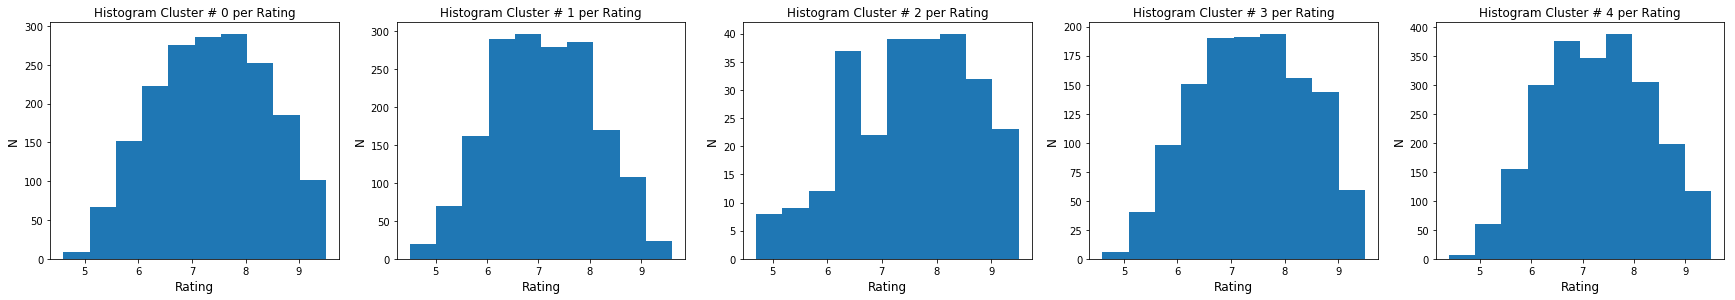

451
455


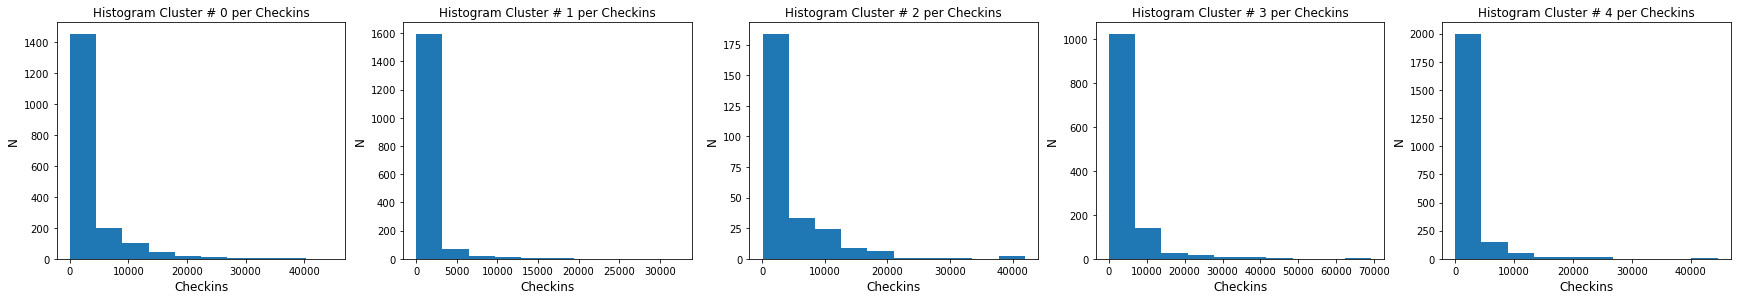

451
455


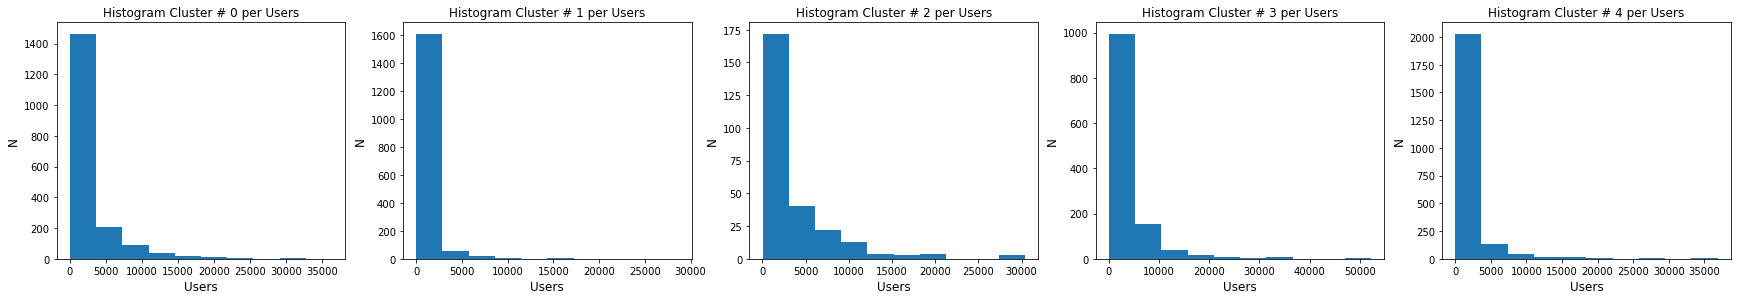

451
455


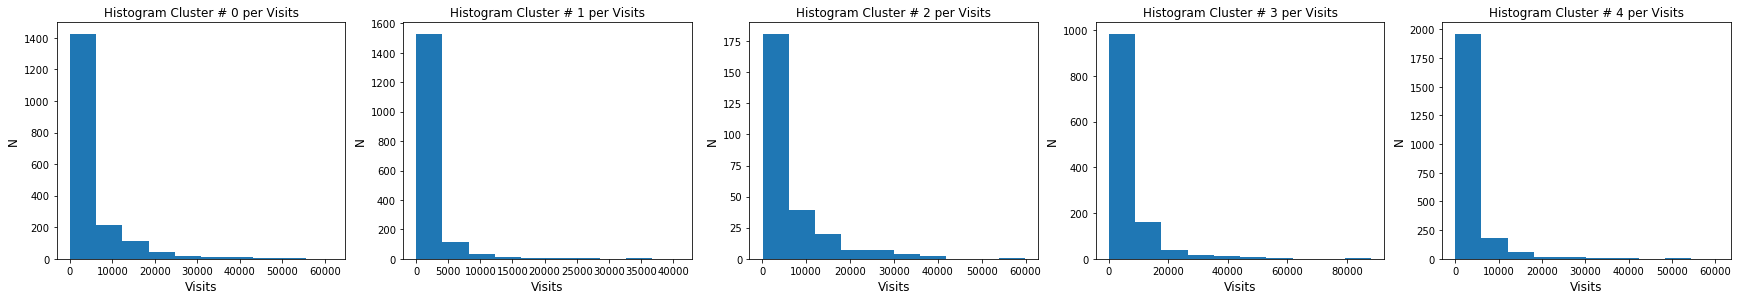

451
455


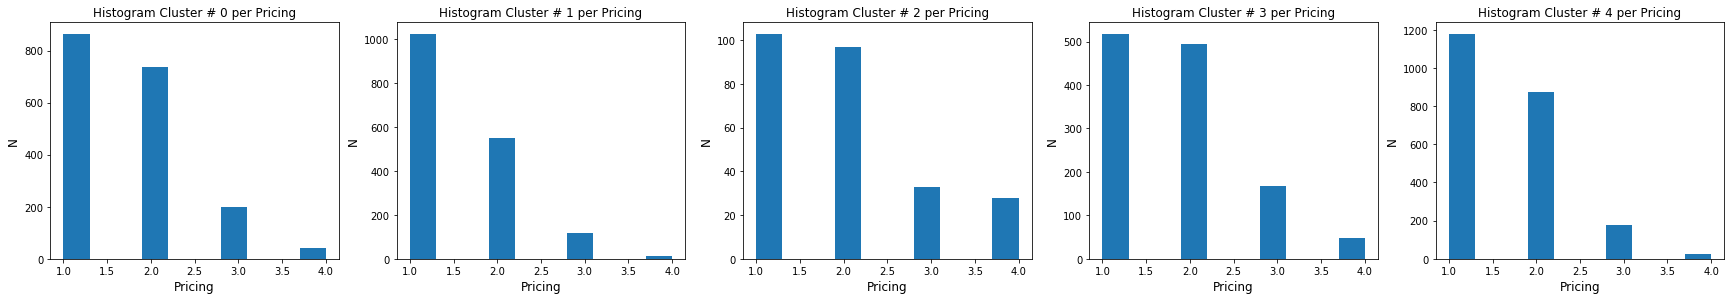

In [258]:
for i, column in enumerate(Foursquare.iloc[:,:5].columns):
    start = 451
    seq = 0
    print(start + seq)
    plt.subplot(start + seq)
    plt.title('Histogram Cluster # 0 per '+column)
    plt.ylabel('N', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.hist(list(X_geoID.loc[:,column][y == 0]))
    
    seq  += 1 
    plt.subplot(start + seq)
    plt.title('Histogram Cluster # 1 per '+column)
    plt.ylabel('N', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.hist(list(X_geoID.loc[:,column][y == 1]))
#     plt.Figure(figsize=(5,5))
    
    seq  += 1
    plt.subplot(start + seq)
    plt.title('Histogram Cluster # 2 per '+column)
    plt.ylabel('N', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.hist(list(X_geoID.loc[:,column][y == 2]))
#     plt.Figure(figsize=(5,5))
    
    seq  += 1 
    plt.subplot(start + seq)
    plt.title('Histogram Cluster # 3 per '+column)
    plt.ylabel('N', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.hist(list(X_geoID.loc[:,column][y == 3]))
#     plt.Figure(figsize=(5,5))
    
    seq  += 1 
    print(start + seq)
    plt.subplot(start + seq)
    plt.title('Histogram Cluster # 4 per '+column)
    plt.ylabel('N', fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.hist(list(X_geoID.loc[:,column][y == 4]))
    plt.Figure(figsize=(5,1))
    plt.show()
    
#     plt.hist(list(maps.loc[:,column][y == 2]))
#     plt.hist(list(maps.loc[:,column][y == 3]))

#     plt.hist(list(maps.loc[:,column][y == 4]))

#     plt.hist(list(maps.loc[:,column][y == 5]))
    

In [259]:
Foursquare.iloc[:,5:8].columns

Index(['Type', 'Category', 'Class'], dtype='object')

In [260]:
pdmaps_0.head(2)

,hinc16,GEOID,Rating,Checkins,Users,Visits,Pricing,Type,Category,Class
98,91827.0,36061010000,7.4,6625.0,6193.0,7943.0,3.0,Hotel Bar,Social,Optional
99,91827.0,36061010000,6.7,9859.0,7960.0,12600.0,1.0,Bar,Social,Optional


# Groupby Type

In [261]:
2275.81651376
1315.65497949
3068.22148541
1729.88672689
899.655345912

899.655345912

In [263]:
print(maps2[y==0].describe()['hinc16'][1])
print('med')

print(maps2[y==1].describe()['hinc16'][1])
print('very low')

print(maps2[y==2].describe()['hinc16'][1])
print('very high')

print(maps2[y==3].describe()['hinc16'][1])
print('high')

print(maps2[y==4].describe()['hinc16'][1])
print('low')

98757.242671
med
39308.0680352
very low
199816.777778
very high
134533.405207
high
67920.2108994
low


In [264]:
clusters = ['med','vlow','vhigh','high','low']

In [317]:
foursquare_groupbied = {}
foursquare_clusters = {}
for fq in list(Foursquare.columns[-3:]):
    print(fq)
    foursquare_groupbied[fq] = (X_geoID.groupby(by=fq, axis=0).count()/X_geoID.groupby(by=fq, axis=0).count().sum()[0]).iloc[:,:1]
    foursquare_groupbied[fq][fq+'_total'+str(X_geoID.groupby(by=fq, axis=0).count().sum()[0])] = ''
    print(foursquare_groupbied[fq].shape)

    for i, business_type in enumerate(list(X_geoID.groupby(by=fq, axis=0).count().index)):
        foursquare_groupbied[fq].iloc[i,1:] = str(str(business_type)+'_'+str(X_geoID.groupby(by=fq, axis=0).count().iloc[i,1]))
    foursquare_groupbied[fq].rename(columns={'hinc16': "All"},inplace=True)
    print(foursquare_groupbied[fq].columns)
    foursquare_clusters[fq] = {} 
    foursquare_clusters[fq][clusters[0]] = pd.DataFrame(pdmaps_0.groupby(by=fq, axis=0).count().GEOID)/pdmaps_0.groupby(by=fq, axis=0).count().sum()[0]
    foursquare_clusters[fq][clusters[1]] = pd.DataFrame(pdmaps_1.groupby(by=fq, axis=0).count().GEOID)/pdmaps_1.groupby(by=fq, axis=0).count().sum()[0]
    foursquare_clusters[fq][clusters[2]] = pd.DataFrame(pdmaps_2.groupby(by=fq, axis=0).count().GEOID)/pdmaps_2.groupby(by=fq, axis=0).count().sum()[0]
    foursquare_clusters[fq][clusters[3]] = pd.DataFrame(pdmaps_3.groupby(by=fq, axis=0).count().GEOID)/pdmaps_3.groupby(by=fq, axis=0).count().sum()[0]
    foursquare_clusters[fq][clusters[4]] = pd.DataFrame(pdmaps_4.groupby(by=fq, axis=0).count().GEOID)/pdmaps_4.groupby(by=fq, axis=0).count().sum()[0]
    
    for cluster in clusters:
        foursquare_groupbied[fq] = foursquare_groupbied[fq].merge(foursquare_clusters[fq][cluster], \
                                  on = fq, how = 'outer')
        print(foursquare_groupbied[fq].shape)
        foursquare_groupbied[fq].rename(columns={'GEOID': cluster},inplace=True)
    #     count_by_cluster['pdmaps_1'] = pdmaps_1.groupby(by=column, axis=0).count().GEOID/pdmaps_1.groupby(by='Type', axis=0).count().sum()[0]
    #     count_by_cluster['pdmaps_2'] = pdmaps_2.groupby(by=column, axis=0).count().GEOID/pdmaps_2.groupby(by='Type', axis=0).count().sum()[0]
    #     count_by_cluster['pdmaps_3'] = pdmaps_3.groupby(by=column, axis=0).count().GEOID/pdmaps_3.groupby(by='Type', axis=0).count().sum()[0]
    #     count_by_cluster['pdmaps_4'] = pdmaps_4.groupby(by=column, axis=0).count().GEOID/pdmaps_4.groupby(by='Type', axis=0).count().sum()[0]

Type
(142, 2)
Index(['All', 'Type_total7294'], dtype='object')
(142, 3)
(142, 4)
(142, 5)
(142, 6)
(142, 7)
Category
(4, 2)
Index(['All', 'Category_total7294'], dtype='object')
(4, 3)
(4, 4)
(4, 5)
(4, 6)
(4, 7)
Class
(2, 2)
Index(['All', 'Class_total7294'], dtype='object')
(2, 3)
(2, 4)
(2, 5)
(2, 6)
(2, 7)


In [318]:
# for cluster in clusters:
#     count_by_cluster = count_by_cluster.merge(clustersgrouped[cluster], \
#                               on = 'Type')
#     count_by_cluster.rename(columns={'GEOID': cluster},inplace=True)
# #     count_by_cluster['pdmaps_1'] = pdmaps_1.groupby(by=column, axis=0).count().GEOID/pdmaps_1.groupby(by='Type', axis=0).count().sum()[0]
# #     count_by_cluster['pdmaps_2'] = pdmaps_2.groupby(by=column, axis=0).count().GEOID/pdmaps_2.groupby(by='Type', axis=0).count().sum()[0]
# #     count_by_cluster['pdmaps_3'] = pdmaps_3.groupby(by=column, axis=0).count().GEOID/pdmaps_3.groupby(by='Type', axis=0).count().sum()[0]
# #     count_by_cluster['pdmaps_4'] = pdmaps_4.groupby(by=column, axis=0).count().GEOID/pdmaps_4.groupby(by='Type', axis=0).count().sum()[0]

In [319]:
for fq in list(Foursquare.columns[-3:]):
    foursquare_groupbied[fq].set_index(fq+'_total'+str(X_geoID.groupby(by=fq, axis=0).count().sum()[0]), inplace=True)

In [320]:
# count_by_cluster.rename( columns={'moveinincd': "All", "pdmaps_0": "med_inc","pdmaps_1": "vlow_inc",
#                                   "pdmaps_2": "low_inc","pdmaps_3": "vhigh_inc","pdmaps_4": "high_inc"}, inplace=True)
list(clusters+['All'])

['med', 'vlow', 'vhigh', 'high', 'low', 'All']

In [321]:
new_c = {}

In [322]:
factor = 4
for fq in list(Foursquare.columns[-3:]):
    new_c[fq] = foursquare_groupbied[fq].copy()
    for cluster in clusters:
#         print(cluster)
        new_c[fq][str(cluster+'_4x')] = \
        ((foursquare_groupbied[fq][cluster]<factor*foursquare_groupbied[fq][clusters[0]]) & \
            (foursquare_groupbied[fq][cluster]<factor*foursquare_groupbied[fq][clusters[1]]) & \
                            (foursquare_groupbied[fq][cluster]<factor*foursquare_groupbied[fq][clusters[2]]) & \
                                (foursquare_groupbied[fq][cluster]<factor*foursquare_groupbied[fq][clusters[3]]) & \
                                    (foursquare_groupbied[fq][cluster]<factor*foursquare_groupbied[fq][clusters[4]]))

In [323]:
distinguished = {}
for fq in list(Foursquare.columns[-3:]):
    print(fq)
    distinguished[fq] = list(new_c[fq].iloc[:,6:][new_c[fq].iloc[:,6:]==0].dropna(how='all',axis=0).index)
    print(fq,distinguished[fq])
# fq = 'Type'
# for fq in list(Foursquare.columns):
#     distinuished = list(newcluster.iloc[:,6:][newcluster.iloc[:,6:]==0].dropna(how='all',axis=0).index)
# distinuished

Type
Type ['Afghan Restaurant_2', 'African Restaurant_9', 'Arepa Restaurant_4', 'Argentinian Restaurant_2', 'Australian Restaurant_3', 'Austrian Restaurant_5', 'BBQ Joint_41', 'Bar_338', 'Bavarian Restaurant_1', 'Beer Bar_1', 'Beer Garden_18', 'Belgian Restaurant_3', 'Bistro_3', 'Brazilian Restaurant_12', 'Brewery_9', 'Bubble Tea Shop_14', 'Buffet_3', 'Burrito Place_11', 'Cafeteria_1', 'Cajun / Creole Restaurant_5', 'Caribbean Restaurant_80', 'Churrascaria_1', 'Colombian Restaurant_1', 'Comfort Food Restaurant_1', 'Creperie_3', 'Cupcake Shop_14', 'Czech Restaurant_1', 'Dim Sum Restaurant_6', 'Dive Bar_31', 'Doner Restaurant_1', 'Donut Shop_334', 'Dumpling Restaurant_15', 'Eastern European Restaurant_8', 'Empanada Restaurant_5', 'Ethiopian Restaurant_8', 'Falafel Restaurant_18', 'Fast Food Restaurant_297', 'Filipino Restaurant_13', 'Fish & Chips Shop_3', 'Fondue Restaurant_1', 'Food_1', 'Food Court_3', 'Food Truck_57', 'French Restaurant_65', 'Fried Chicken Joint_56', 'Frozen Yogurt Sho

In [324]:
fq

'Class'

In [325]:
new_c[fq].iloc[:,6:][new_c[fq].iloc[:,6:]==0].dropna(how='all',axis=0)

,med_4x,vlow_4x,vhigh_4x,high_4x,low_4x
Class_total7294,,,,,


In [326]:
foursquare_groupbied[fq].sort_values(by=['All'],axis=0,ascending=False, inplace=True)

Type
Category
Class


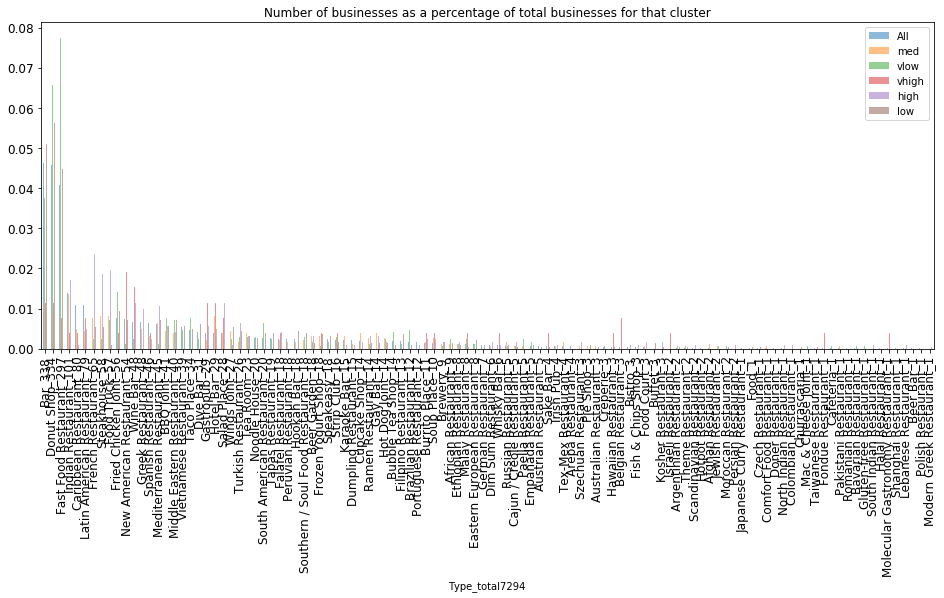

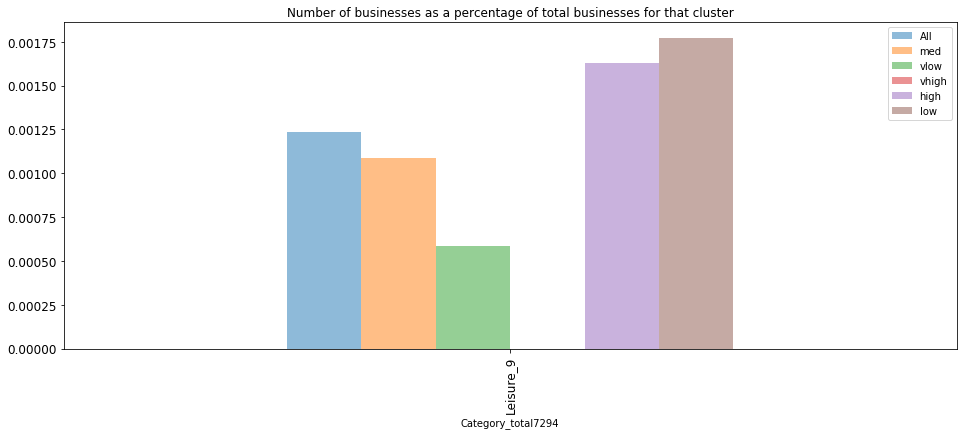

In [336]:
distinguished_df[fq] = {}
for fq in list(Foursquare.columns[-3:]):
    print(fq)
    distinguished_df[fq] = foursquare_groupbied[fq].loc[distinguished[fq]].sort_values(by=['All'],axis=0,ascending=False)

    
    if len(foursquare_groupbied[fq].loc[distinguished[fq]]) == 0:
        pass
    else:
        plt.figure()
        distinguished_df[fq].plot.bar(alpha=0.5,figsize=(16,6), title='Number of businesses as a percentage of total businesses for that cluster', fontsize=12)
        plt.legend()

Type
142
Category
4
Class
2


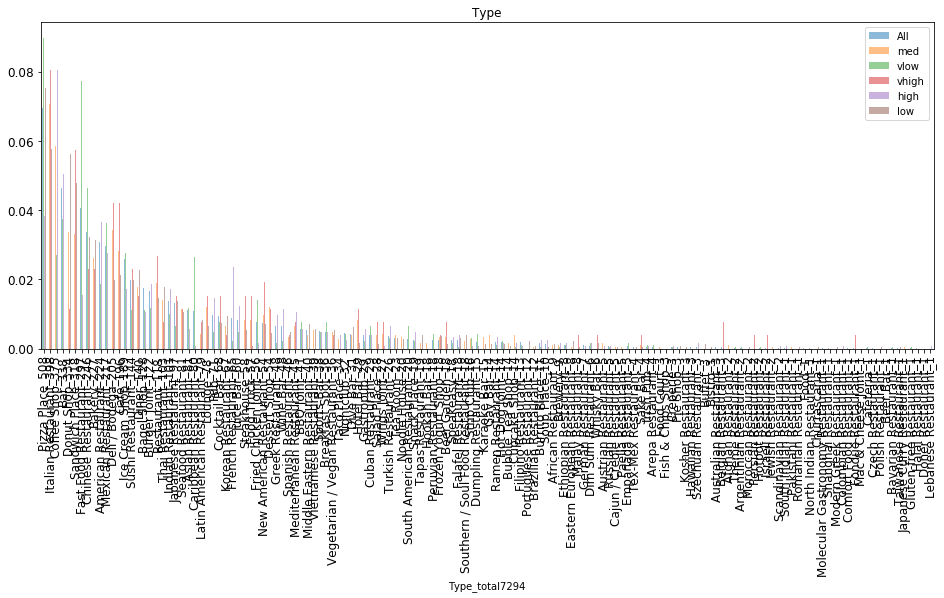

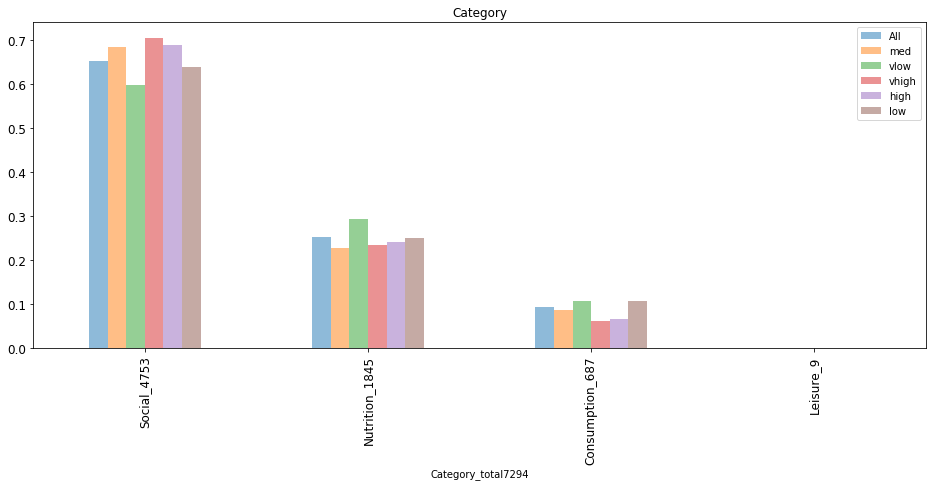

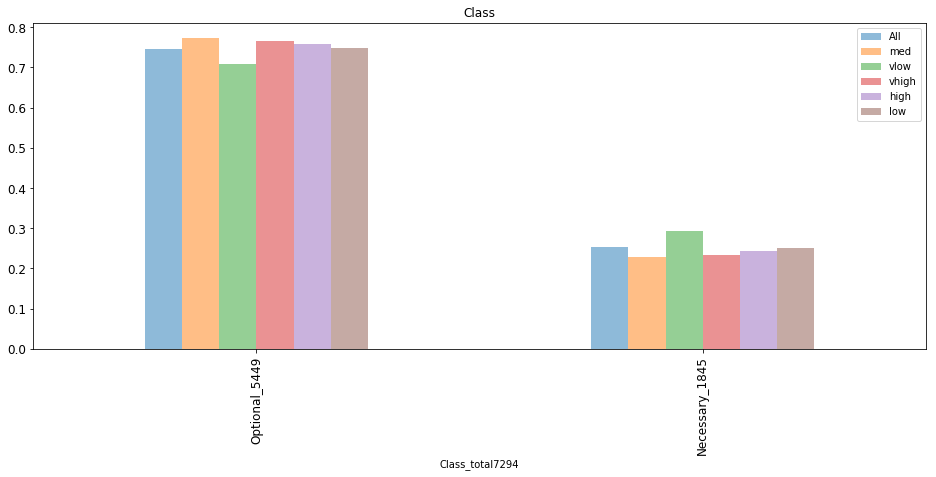

In [328]:

for fq in list(Foursquare.columns[-3:]):
    foursquare_groupbied[fq].sort_values(by=['All'],axis=0,ascending=False, inplace=True)
    print(fq)
    print(len(foursquare_groupbied[fq]))
    plt.figure()
    foursquare_groupbied[fq].plot.bar(alpha=0.5,figsize=(16,6), title=fq, fontsize=12)
    plt.legend()

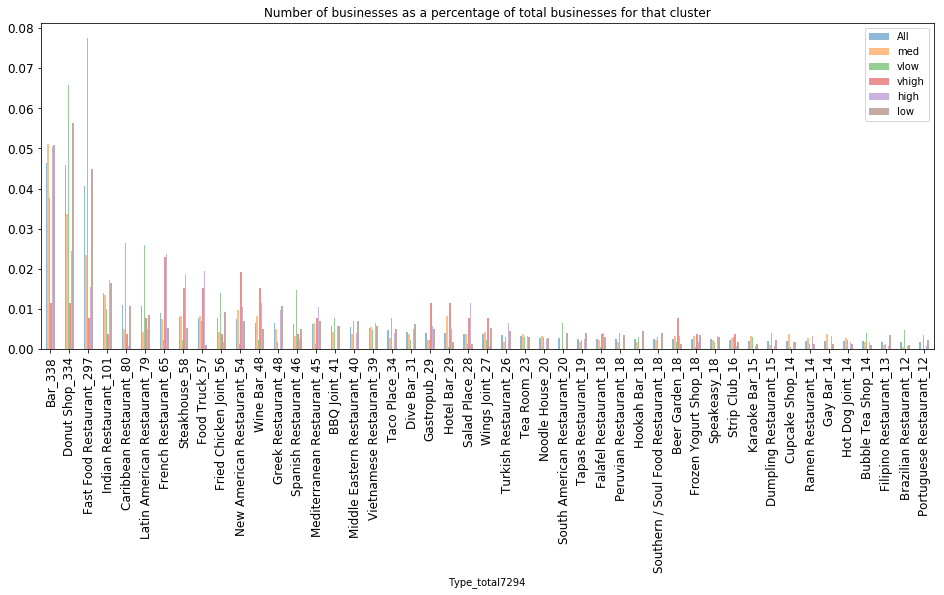

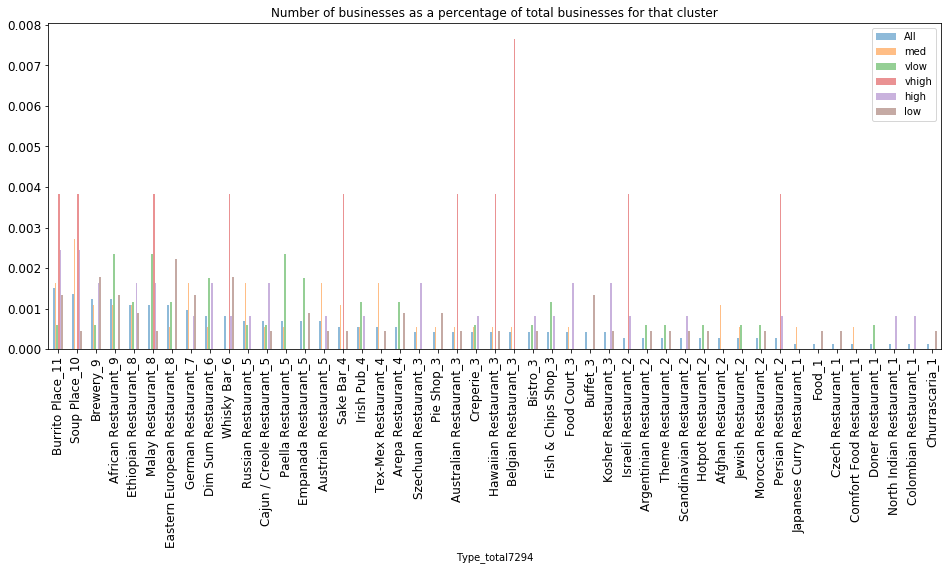

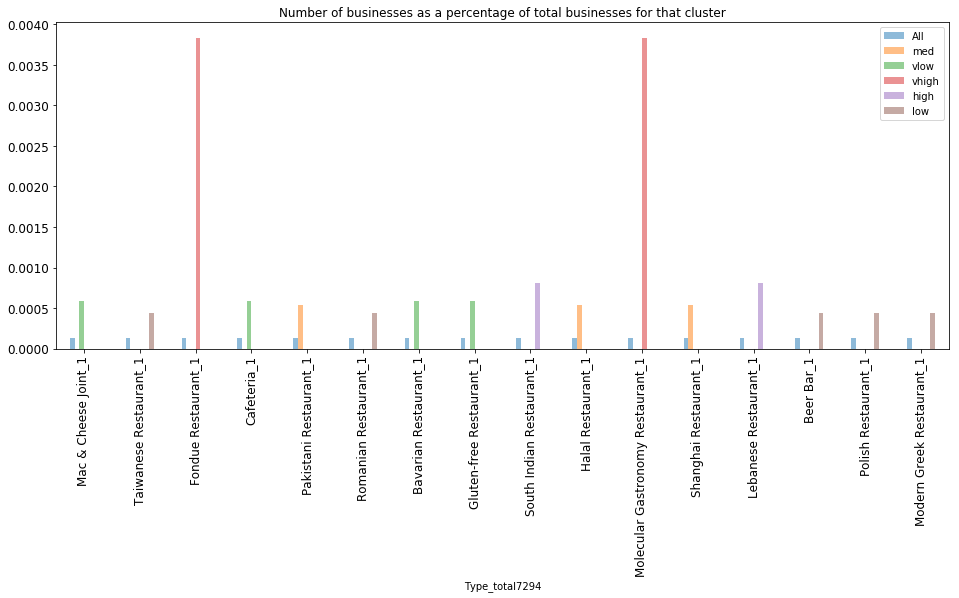

In [342]:
distinguished_df = {}
for fq in list(Foursquare.columns[-3:-2]):
    distinguished_df[fq] = foursquare_groupbied[fq].loc[distinguished[fq]]
    distinguished_df[fq].sort_values(by=['All'],axis=0,ascending=False, inplace=True)
    counter = [0]
#     print(fq)
    for i in range(3):
        counter.append((i+1)*(len(foursquare_groupbied[fq])//3))
#         print(len(foursquare_groupbied[fq]))
#         print((i+1))
#         print(len(foursquare_groupbied[fq])//2+1)
#         print(counter)
        plt.figure()
        distinguished_df[fq].iloc[counter[i]:counter[i+1]].plot.bar(alpha=0.5,figsize=(16,6), title='Number of businesses as a percentage of total businesses for that cluster', fontsize=12)
        plt.legend()


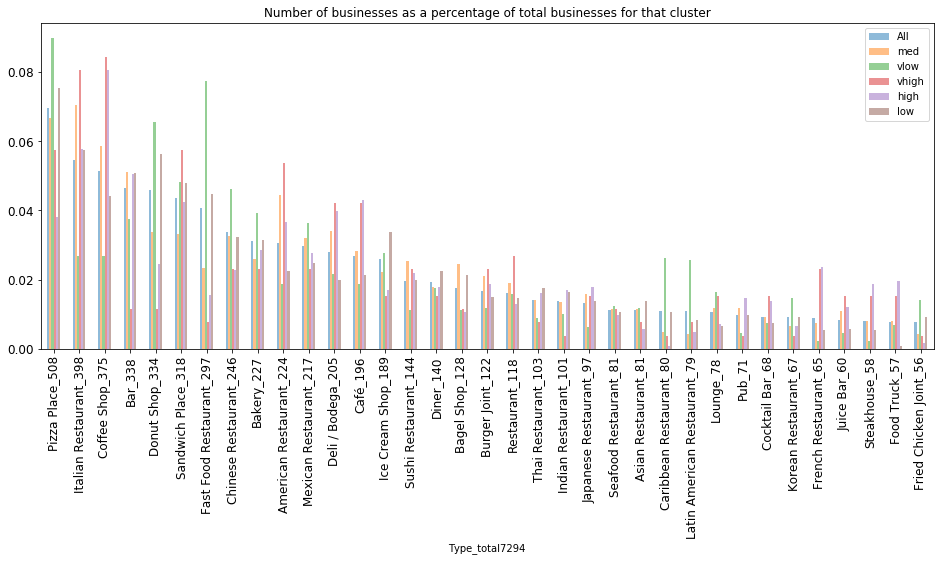

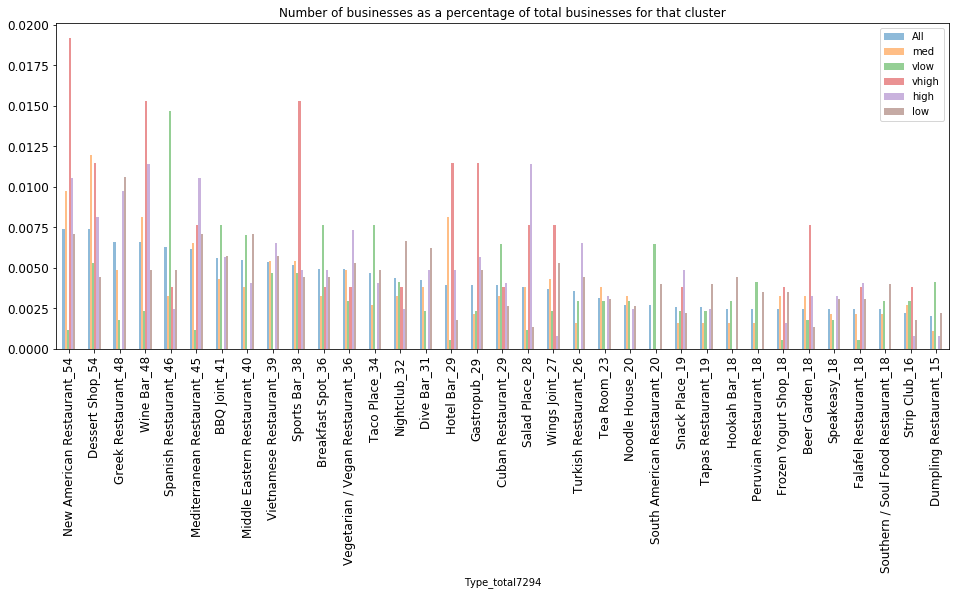

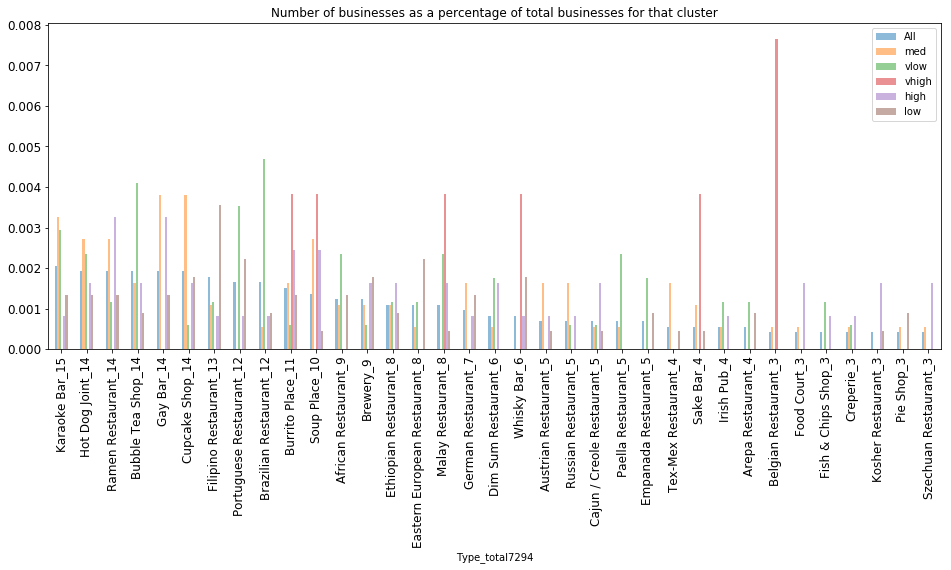

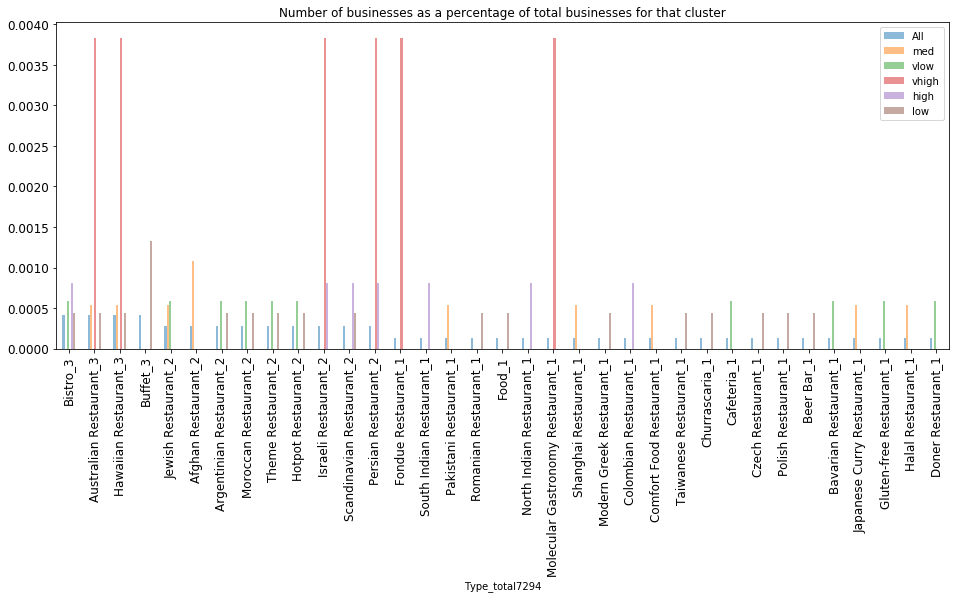

In [341]:
for fq in list(Foursquare.columns[-3:-2]):
    foursquare_groupbied[fq].sort_values(by=['All'],axis=0,ascending=False, inplace=True)
    foursquare_groupbied[fq]
    counter = [0]
#     print(fq)
    for i in range(4):
        counter.append((i+1)*(len(foursquare_groupbied[fq])//4))
#         print(len(foursquare_groupbied[fq]))
#         print((i+1))
#         print(len(foursquare_groupbied[fq])//2+1)
#         print(counter)
        plt.figure()
        foursquare_groupbied[fq].iloc[counter[i]:counter[i+1]].plot.bar(alpha=0.5,figsize=(16,6), title='Number of businesses as a percentage of total businesses for that cluster', fontsize=12)
        plt.legend()


In [331]:
# foursquare_groupbied_mean = {}
# foursquare_clusters_mean = {}
# for fq in list(Foursquare.columns[-1:-4]):
#     print(fq)
#     name = fq+'_total_'+str(X_geoID.describe().loc['count'][fq])
#     foursquare_groupbied_mean[name] = {}
#     foursquare_groupbied_mean[name]['All'] = (X_geoID.describe().loc['mean'][fq]/X_geoID.describe().loc['count'][fq])
#     foursquare_groupbied_mean[name][clusters[0]] = pdmaps_0.describe().loc['mean'][fq]/pdmaps_0.describe().loc['count'][fq]
#     foursquare_groupbied_mean[name][clusters[1]] = pdmaps_1.describe().loc['mean'][fq]/pdmaps_1.describe().loc['count'][fq]
#     foursquare_groupbied_mean[name][clusters[2]] = pdmaps_2.describe().loc['mean'][fq]/pdmaps_2.describe().loc['count'][fq]
#     foursquare_groupbied_mean[name][clusters[3]] = pdmaps_3.describe().loc['mean'][fq]/pdmaps_3.describe().loc['count'][fq]
#     foursquare_groupbied_mean[name][clusters[4]] = pdmaps_4.describe().loc['mean'][fq]/pdmaps_4.describe().loc['count'][fq]
# foursquare_groupbied_mean

In [332]:
# for fq in list(Foursquare.columns[:-3]):
#     name  = fq+'_total_'+str(X_geoID.describe().loc['count'][fq])

#     D = foursquare_groupbied_mean[name]
#     plt.bar(range(len(D)), D.values(), align='center')
#     plt.title(fq)
#     plt.xticks(range(len(D)), list(D.keys()))
# #     .plot.bar(alpha=0.5,figsize=(16,6), title=fq, fontsize=12)
#     plt.legend()
#     plt.show()

In [344]:
pdmaps_0.describe()

,hinc16,GEOID,Rating,Checkins,Users,Visits,Pricing
count,1842.000000,1.842000e+03,1842.000000,1842.000000,1842.00000,1842.000000,1842.000000
mean,98757.242671,3.552859e+10,7.374919,3119.361021,2406.36645,4540.888165,1.684039
std,9299.604929,8.949763e+08,1.050724,5087.256171,3924.94891,7123.491985,0.754530
min,83393.000000,3.400300e+10,4.600000,2.000000,5.00000,5.000000,1.000000
25%,90938.000000,3.403904e+10,6.600000,336.000000,253.00000,509.250000,1.000000
50%,98608.000000,3.606100e+10,7.400000,1040.000000,834.50000,1607.500000,2.000000
75%,105227.000000,3.606101e+10,8.200000,3505.750000,2869.25000,5344.750000,2.000000
max,116250.000000,3.608503e+10,9.500000,44782.000000,36368.00000,61702.000000,4.000000


In [333]:
foursquare_groupbied_mean = {}
foursquare_clusters_mean = {}
for fq in list(Foursquare.columns[:-3]):
    print(fq)
    name = fq+'_total_'+str(X_geoID.describe().loc['count'][fq])
    foursquare_groupbied_mean[name] = {}
    foursquare_groupbied_mean[name]['All'] = X_geoID.describe().loc['mean'][fq]
    foursquare_groupbied_mean[name][clusters[0]] = pdmaps_0.describe().loc['mean'][fq]
    foursquare_groupbied_mean[name][clusters[1]] = pdmaps_1.describe().loc['mean'][fq]
    foursquare_groupbied_mean[name][clusters[2]] = pdmaps_2.describe().loc['mean'][fq]
    foursquare_groupbied_mean[name][clusters[3]] = pdmaps_3.describe().loc['mean'][fq]
    foursquare_groupbied_mean[name][clusters[4]] = pdmaps_4.describe().loc['mean'][fq]
foursquare_groupbied_mean

Rating
Checkins
Users
Visits
Pricing


{'Checkins_total_7294.0': {'All': 2477.6238003838771,
  'high': 3949.2262001627341,
  'low': 2023.3008418254319,
  'med': 3119.3610206297503,
  'vhigh': 4151.946360153257,
  'vlow': 1068.667448680352},
 'Pricing_total_7294.0': {'All': 1.6309295311214698,
  'high': 1.7941415785191213,
  'low': 1.5759858218874612,
  'med': 1.6840390879478828,
  'vhigh': 1.946360153256705,
  'vlow': 1.4803519061583579},
 'Rating_total_7294.0': {'All': 7.2857005758157527,
  'high': 7.3843775427176546,
  'low': 7.2766061143110203,
  'med': 7.3749185667752437,
  'vhigh': 7.5206896551724105,
  'vlow': 7.0942521994134999},
 'Users_total_7294.0': {'All': 1981.3446668494653,
  'high': 3291.726606997559,
  'low': 1557.2246344705361,
  'med': 2406.3664495114008,
  'vhigh': 3422.9425287356321,
  'vlow': 918.37243401759531},
 'Visits_total_7294.0': {'All': 3722.5309843707155,
  'high': 5799.6753458096009,
  'low': 3051.1883030571557,
  'med': 4540.8881650380026,
  'vhigh': 6118.2796934865901,
  'vlow': 1863.12082111

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


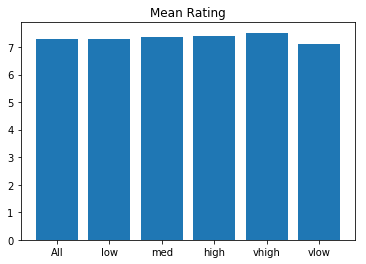

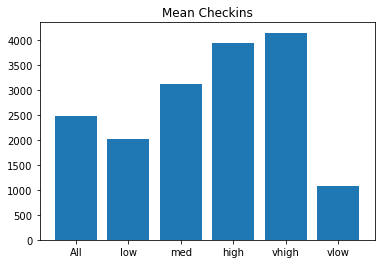

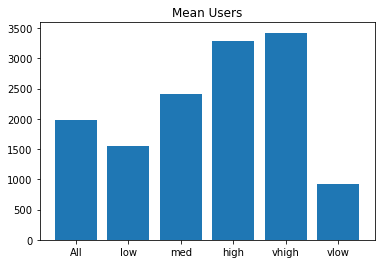

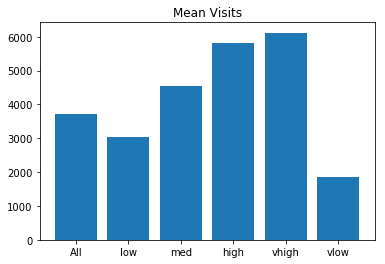

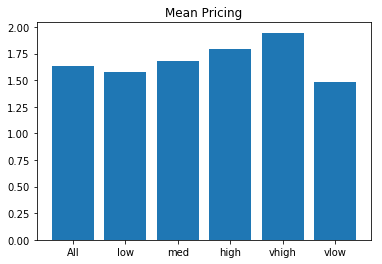

In [345]:
for fq in list(Foursquare.columns[:-3]):
    name  = fq+'_total_'+str(X_geoID.describe().loc['count'][fq])

    D = foursquare_groupbied_mean[name]
    plt.figure(figsize=(6,4))
    plt.bar(range(len(D)), D.values(), align='center',)
    plt.title('Mean ' +fq)
    plt.xticks(range(len(D)), list(D.keys()))
#     .plot.bar(alpha=0.5,figsize=(16,6), title=fq, fontsize=12)
    plt.legend()
    plt.show()